In [1]:
import numpy as np
import pandas as pd
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("/content/HR_Analytics/train_data.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


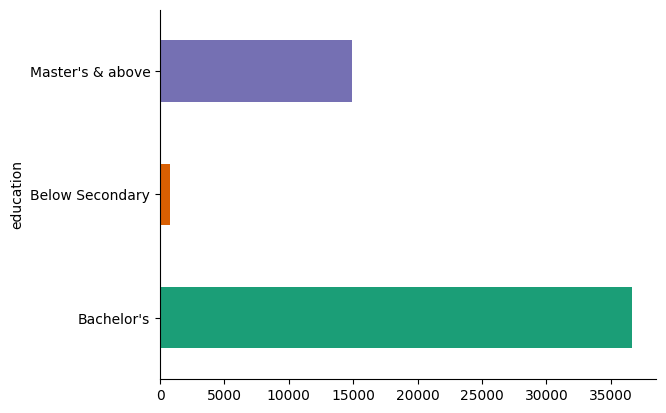

In [8]:
# @title education

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
# shape of dataset
print("shape of dataframe is : ", data.shape)
# summary of data
data.info()
# Get Statistical details of data

shape of dataframe is :  (54808, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5

In [5]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
#Checking the unique value counts in columns
featureValues={}
for d in data.columns.tolist():
    count=data[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n []


In [7]:
#Drop employee_id column as it is just a unique id
data.drop("employee_id",inplace=True,axis=1)
#Checking null percentage
data.isnull().mean()*100

,0
department,0.000000
region,0.000000
education,4.395344
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
previous_year_rating,7.524449
length_of_service,0.000000
KPIs_met >80%,0.000000


In [9]:
#fill missing value
data["previous_year_rating"]= data["previous_year_rating"].fillna(0)
#change type to int
data["previous_year_rating"]= data["previous_year_rating"].astype("int")
#Find out mode value for education
data["education"].mode()
#fill missing value with mode
data["education"]= data["education"].fillna("Bachelor's")

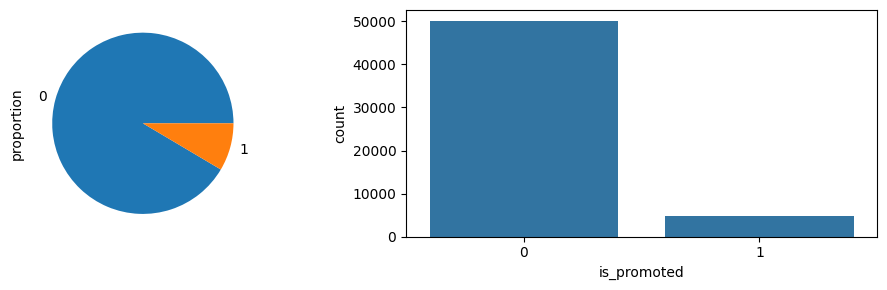

In [10]:
# cchart for distribution of target variable
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= data["is_promoted"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=data["is_promoted"])
plt.tight_layout()
plt.show()

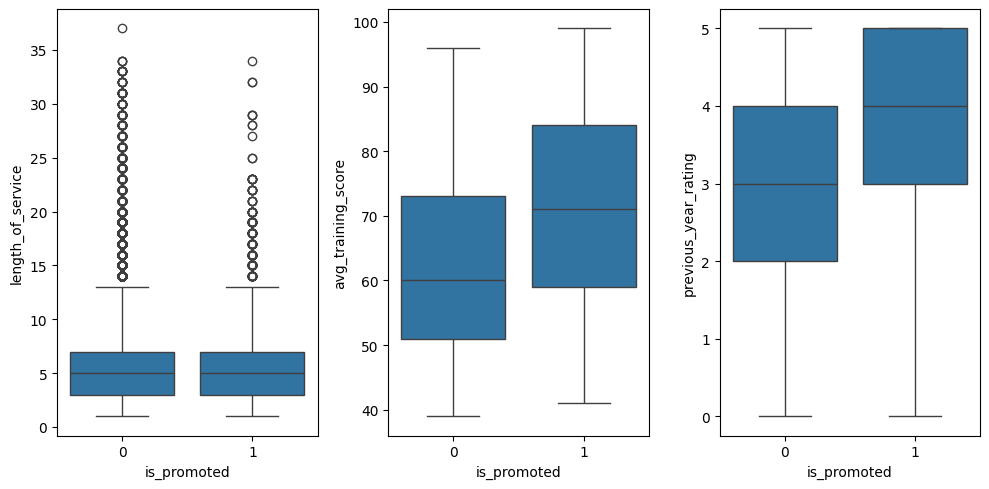

In [11]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["length_of_service"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["avg_training_score"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["previous_year_rating"])
plt.tight_layout()
plt.show()


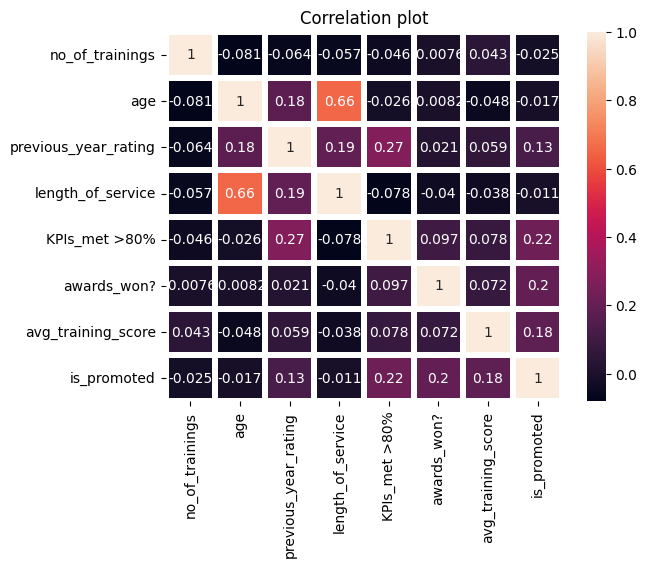

In [13]:
#correlation between features
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

corr_plot = sns.heatmap(numerical_data.corr(), annot=True, linewidths=3)
plt.title("Correlation plot")
plt.show()

In [14]:
#Converting Categorical columns into one hot encoding
data["gender"]=data["gender"].apply(lambda x: 1 if x=="m" else 0)
#list of columns
cols = data.select_dtypes(["object"]).columns
#Create dummy variables
ds=pd.get_dummies(data[cols],drop_first=True)
ds
#concat newly created columns with original dataframe
data=pd.concat([data,ds],axis=1)
#Drop original columns
data.drop(cols,axis=1,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split
#split data into dependent variables(X) and independent variable(y) that we would predict
y = data.pop("is_promoted")
X = data
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (43846, 53)
train size y :  (43846,)
test size X :  (10962, 53)
test size y :  (10962,)


In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [17]:
#check for distribution of labels
y_train.value_counts(normalize=True)

,proportion
is_promoted,
0,0.914245
1,0.085755


In [18]:
#import library
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight
#as we will add class weights due to class imbalance problem
lr_basemodel =LogisticRegression(class_weight={0:0.1,1:0.9})
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9})

In [20]:
from sklearn.metrics import f1_score

# Predict target variable using the trained model
y_pred_basemodel = lr_basemodel.predict(X_test)

# Calculate and print the F1 score
print("f1 score for base model is : ", f1_score(y_test, y_pred_basemodel))

f1 score for base model is :  0.38443208895949166


In [23]:
#Hyperparameter tuning
# define model/create instance
from sklearn.model_selection import StratifiedKFold, GridSearchCV # Import necessary classes
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _che

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                                          {0: 0.04959919839679359,
                                           1: 0.9504008016032064},
                                          {0: 0.05158316633266533,
                                           1: 0.9484168336673346},
                                          {0: 0.05356713426853708,
                                           1: 0.9464328657314629},
                                          {0: 0.055551102204408814,
                                           1: 0.9444488977955912},
                                          {0: 0.05753507014028056,
                                           1: 0.9424649298597194}, ...],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [24]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.4484564501337241
Best hyperparameters:  {'C': 20, 'class_weight': {0: 0.2698196392785571, 1: 0.7301803607214429}, 'penalty': 'l2'}


In [25]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=20, class_weight={0: 0.27, 1: 0.73})

In [26]:
# predict probabilities on Test and take probability for class 1([:1])
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test))

confusion Matrix is :nn [[9576  478]
 [ 518  390]]
n
ROC-AUC score  test dataset:  t 0.8801556397217142
precision score  test dataset:  t 0.44930875576036866
Recall score  test dataset:  t 0.42951541850220265
f1 score  test dataset :  t 0.4391891891891892
